Meal columns: 9
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Subway]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Habit Burger]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Panda Express]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Chronic Tacos]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Hibachi-san]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Halal Shack]
 - Please rate how often you eat at each of the following on-campu

C:\Users\Jonat\AppData\Local\Temp\ipykernel_15224\1541762208.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  meal_data = df[meal_cols].applymap(clean_rating)


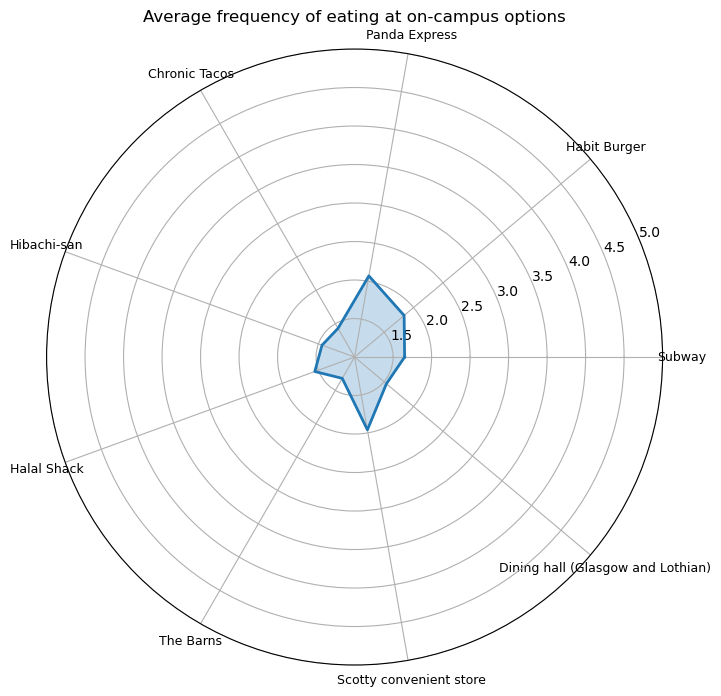

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load
df = pd.read_csv("responses.csv")

# find the meal-rating columns
meal_cols = [
    col for col in df.columns
    if "Please rate how often you eat at each of the following on-campus meal options" in col
]

print("Meal columns:", len(meal_cols))
for c in meal_cols:
    print(" -", c)

# helper: clean a rating cell to an int 1–5
def clean_rating(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    # cases:
    # "1", "2", "3", "4", "5"
    # "1.0"
    # "1 - Never"
    # "5 (Very Often)"
    # so just grab the first char that is a digit
    for ch in x:
        if ch.isdigit():
            return int(ch)
    return np.nan

# apply cleaning to each meal column
meal_data = df[meal_cols].applymap(clean_rating)

# check if we got anything
print("\nSample cleaned data:")
print(meal_data.head())

# compute averages
avg_ratings = meal_data.mean().round(2)

# labels: pull text inside [...]
labels = [col.split("[")[-1].split("]")[0] for col in meal_cols]

# radar prep
values = avg_ratings.values.tolist()
values += values[:1]  # close loop

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2, linestyle="solid")
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)

# since your scale is 1–5
ax.set_ylim(1, 5)

plt.title("Average frequency of eating at on-campus options", pad=20)
plt.show()


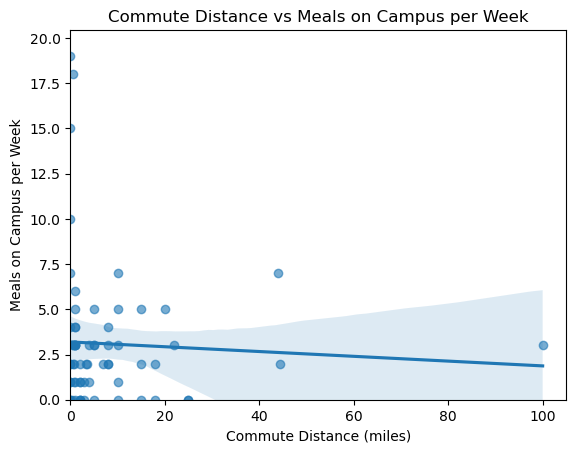

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Clean and convert numeric columns
df['commute_miles'] = pd.to_numeric(
    df['How far is your commute to UCR (in miles)? Answer with a number only. '],
    errors='coerce'
)
df['meals_per_week'] = pd.to_numeric(
    df['In a typical week, how many times do you eat a regular meal on campus? A “meal” refers to a substantial amount of food, such as breakfast, lunch, or dinner — not a snack.\r\n\r\n____ times a week. (Enter a number only)'],
    errors='coerce'
)

# Create scatter + regression line
sns.regplot(
    data=df,
    x='commute_miles',
    y='meals_per_week',
    scatter_kws={'alpha': 0.6}
)

# Titles and labels
plt.title("Commute Distance vs Meals on Campus per Week")
plt.xlabel("Commute Distance (miles)")
plt.ylabel("Meals on Campus per Week")

# Floor both axes at 0
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()
